In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(43)
torch.__version__

'1.8.1+cu101'

In [2]:
# Generate Dataset for Regression

# Generate 100 data points
N = 100

# random data on the x-axis in (-5, +5)
X = np.random.random(N)*10 - 5

# add some noise
Y = 0.5 * X - 1 + np.random.randn(N)

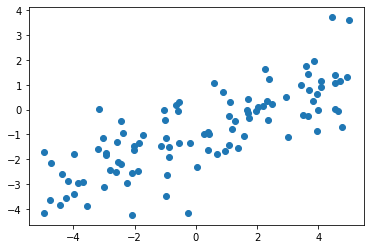

In [3]:
plt.scatter(X,Y)

In [4]:
# ML algorithms expects data in the form of (num_samples x num_dimensions)
X = X.reshape(N, 1)

# Pytorch expects output data also in the form of (num_samples x num_dimensions)
Y = Y.reshape(N, 1)

In [5]:
input_size =  X.shape[1]
output_size = Y.shape[1]

# PyTorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [6]:
type(inputs)

torch.Tensor

In [7]:
# Define Model

# create linear model with one input with one output
model = nn.Linear(input_size,output_size)

# Define Loss function
criterion = nn.MSELoss()

# Define Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [8]:
# Training Loop

n_epochs = 30
losses = []

for i in range(n_epochs):
    
    # Since the backward() function accumulates gradients
    # don’t want to mix up gradients between minibatches
    # have to zero them out at the start of a new minibatch
    optimizer.zero_grad()

    # Forward Pass
    outputs = model(inputs)

    # Compute loss
    loss = criterion(outputs,targets)

    # save loss at each iteration for plottting
    losses.append(loss.item())

    # Backpropagation compute gradient
    loss.backward()

    # optimize the weight
    optimizer.step()

    print(f"Epoch {i+1}/{n_epochs}, Loss: {loss.item():.4f}")

Epoch 1/30, Loss: 1.2684
Epoch 2/30, Loss: 1.1757
Epoch 3/30, Loss: 1.1486
Epoch 4/30, Loss: 1.1277
Epoch 5/30, Loss: 1.1107
Epoch 6/30, Loss: 1.0970
Epoch 7/30, Loss: 1.0858
Epoch 8/30, Loss: 1.0768
Epoch 9/30, Loss: 1.0694
Epoch 10/30, Loss: 1.0635
Epoch 11/30, Loss: 1.0587
Epoch 12/30, Loss: 1.0548
Epoch 13/30, Loss: 1.0516
Epoch 14/30, Loss: 1.0491
Epoch 15/30, Loss: 1.0470
Epoch 16/30, Loss: 1.0453
Epoch 17/30, Loss: 1.0439
Epoch 18/30, Loss: 1.0428
Epoch 19/30, Loss: 1.0419
Epoch 20/30, Loss: 1.0412
Epoch 21/30, Loss: 1.0406
Epoch 22/30, Loss: 1.0401
Epoch 23/30, Loss: 1.0397
Epoch 24/30, Loss: 1.0394
Epoch 25/30, Loss: 1.0392
Epoch 26/30, Loss: 1.0390
Epoch 27/30, Loss: 1.0388
Epoch 28/30, Loss: 1.0386
Epoch 29/30, Loss: 1.0385
Epoch 30/30, Loss: 1.0384


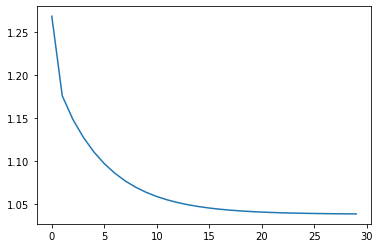

In [9]:
# Plot the loss per iteration
plt.plot(losses)

tensor.detach() creates a tensor that shares storage with tensor that does not require grad. It detaches the output from the computational graph. So no gradient will be backpropagated along this variable.

The wrapper with torch.no_grad() temporarily set all the requires_grad flag to false. torch.no_grad says that no operation should build the graph.

The difference is that one refers to only a given variable on which it is called. The other affects all operations taking place within the with statement. Also, torch.no_grad will use less memory because it knows from the beginning that no gradients are needed so it doesn’t need to keep intermediary results

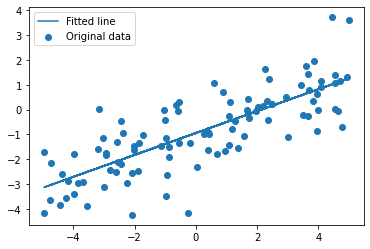

In [10]:
# make prediction
prediction = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, prediction, label='Fitted line')
plt.legend()
plt.show()

In [11]:
# Prediction using with context
with torch.no_grad():
  prediction = model(inputs).numpy()
prediction[1:3]

array([[-0.46294308],
       [-2.5639613 ]], dtype=float32)

In [12]:
# extract model paramters
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.44169146]] [-0.94468063]
